In [27]:
#importing dependencies we will likely need
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import math
from PIL import ImageTk, Image

# Calling in the cleaned data and pulling the columns we want

In [28]:
#reading in the data
data = pd.read_csv(Path("cancer_and_pesticides.csv"))
data.head()

,County,FIPS,Cancer Incidence Rate Per 100k,Insecticide Sum,Herbicide Sum,Fungicide Sum,Adjuvant Sum
0,"Union County, Florida(6)",12125,1237.4,253.1,7146.6,241.5,0.0
1,"Palo Alto County, Iowa(7)",19147,658.1,5897.5,269873.7,4271.9,0.0
2,"Treasure County, Montana(6)",30103,652.2,839.8,76881.9,488.3,0.0
3,"Polk County, Texas(7)",48373,633.6,1.2,1694.6,1.6,0.0
4,"Floyd County, Kentucky(7)",21071,616.8,4.2,812.9,3.8,0.0


In [29]:
#dropping our outlier value
value_to_drop = 'Union County, Florida(6)'
data = data.drop(data[data['County'] == value_to_drop].index)
data.head()

,County,FIPS,Cancer Incidence Rate Per 100k,Insecticide Sum,Herbicide Sum,Fungicide Sum,Adjuvant Sum
1,"Palo Alto County, Iowa(7)",19147,658.1,5897.5,269873.7,4271.9,0.0
2,"Treasure County, Montana(6)",30103,652.2,839.8,76881.9,488.3,0.0
3,"Polk County, Texas(7)",48373,633.6,1.2,1694.6,1.6,0.0
4,"Floyd County, Kentucky(7)",21071,616.8,4.2,812.9,3.8,0.0
5,"Logan County, Nebraska(6)",31113,609.8,604.5,39672.1,420.4,0.0


In [30]:
#filtering to only total cancer incidence and herbicide sum since that was the strongest correlation we found
data = data[["Cancer Incidence Rate Per 100k", "Herbicide Sum"]]
data.head()

,Cancer Incidence Rate Per 100k,Herbicide Sum
1,658.1,269873.7
2,652.2,76881.9
3,633.6,1694.6
4,616.8,812.9
5,609.8,39672.1


# Linear Regression Model

We opted to use linear regression as our first model to evaluate. It's useful for predicting a continuous outcome
variable which is our dependent variable (cancer incidence rates) based on our predictor variable which is the
independent variable (herbicide use). It is also the easiest ML model to begin our exploration with. A linear relationship is assumed between the two variables, with a line of best fit. Please note, attempts to work with the two variables already had a low r score so the model fits best
on its ability but is limited by its low correlation

In [31]:
#labeling our X and y data
X = data["Herbicide Sum"]
y = data["Cancer Incidence Rate Per 100k"]

In [32]:
#reshaping the data
X = X.values.reshape(-1, 1)  # Convert features to a 2D array
y = y.values.reshape(-1, 1)

In [33]:
#checking the shape
print(X.shape)
print(y.shape)

(2369, 1)
(2369, 1)


In [34]:
#splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
# establishing the model
model = LinearRegression()

#fitting the model 
model.fit(X_train, y_train)
print(f"Intercept: {model.intercept_[0]}")
Coeff = model.coef_
print(f"Coefficients: {Coeff[0][0]}")

predictions = model.predict(X_test)

Intercept: 450.0916674141699
Coefficients: 2.3660138902351664e-05


In [36]:
#examining y predictions
y_pred = model.predict(X_test)
print(y_pred)

[[455.17775971]
 [460.05802772]
 [457.84171153]
 [461.7291457 ]
 [452.83693913]
 [450.54099475]
 [462.77914954]
 [450.25817801]
 [450.91625165]
 [450.38389142]
 [451.09549849]
 [450.57667424]
 [450.44605607]
 [450.91539042]
 [450.34853844]
 [459.3782814 ]
 [450.09775753]
 [461.87563035]
 [452.61108181]
 [451.19463448]
 [450.1214508 ]
 [452.46874242]
 [450.18611159]
 [450.49906898]
 [451.52077529]
 [451.63710037]
 [450.2125234 ]
 [455.84432024]
 [451.88208454]
 [450.23985796]
 [450.57467259]
 [450.16045217]
 [450.22600732]
 [450.83048601]
 [451.02795116]
 [451.42679012]
 [450.34637591]
 [450.52165022]
 [455.98739783]
 [451.37956212]
 [450.69584799]
 [453.69518938]
 [467.07477079]
 [453.30324025]
 [457.87873728]
 [454.2296246 ]
 [456.59896983]
 [456.85356476]
 [450.35351181]
 [456.93109667]
 [460.19073271]
 [450.13117511]
 [462.1551678 ]
 [450.63018164]
 [450.14830032]
 [458.26139744]
 [455.94987995]
 [455.0952923 ]
 [450.68659924]
 [451.88077377]
 [452.59343845]
 [450.25315259]
 [450.12

In [50]:
#calculating mae, mse, rmse, and r2

mae = round(mean_absolute_error(y_test, y_pred), 2)
print("Mean Absolute Error:", mae)

mse = round(mean_squared_error(y_test, y_pred), 2)
print("Mean Squared Error:", mse)

rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
print("Root Mean Squared Error:", rmse)

r2 = round(r2_score(y_test, y_pred),2)
print("R Squared: ", r2)


Mean Absolute Error: 42.82
Mean Squared Error: 3099.19
Root Mean Squared Error: 55.67
R Squared:  0.01


In [38]:
#testing the model with a random input for the x variable to see what we get for a y value
herbicide_use_test = 150000
cancer_rate_prediction = model.predict([[herbicide_use_test]])
print('Predicted Cancer Incidence', round(cancer_rate_prediction[0][0], 2))

Predicted Cancer Incidence 453.64


# Random Forest Regression Model

The second model we attempted to create based on our cleaned data is a random forest regression model. It is an extention of the Random Forest algorithm primarily used for classification, but in this case multiple decision trees are utilized to train the data and outputs the mean prediction of the individual trees for regression. Again, similar to the linear regression model the performance is limited due to the beginning low correlation between the two variables.

In [39]:
#importing randomforestregressor from sklearn
from sklearn.ensemble import RandomForestRegressor

In [40]:
#labeling our X_2 and y_2 data different since we used x and y for the linear regression
X_2 = data["Herbicide Sum"]
y_2 = data["Cancer Incidence Rate Per 100k"]

In [41]:
#printing the shape of the X_2 and y_2
print(X_2.shape)
print(y_2.shape)

(2369,)
(2369,)


In [42]:
#ran into an error so i needed to reshape the X_2 values
X_2 = X_2.values.reshape(-1, 1)

In [43]:
#rechecking the shapes of X_2 and y_2
print(X_2.shape)
print(y_2.shape)

(2369, 1)
(2369,)


In [44]:
#separating into training and testing data
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, random_state=42)

In [45]:
#creating the random forest model instance
random_forest_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)

#fitting the model with the training data
random_forest_model.fit(X_2_train, y_2_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [46]:
#making predictions based on the model
forest_predictions = random_forest_model.predict(X_2_test)

In [47]:
forest_df = pd.DataFrame({'Actual': y_2_test, 'Predicted': forest_predictions})
forest_df.head()

,Actual,Predicted
1095,463.7,499.6973
189,521.5,428.8899
1801,419.6,406.3791
708,481.9,502.6516
680,483.5,465.9888


In [48]:
#calculating mae, mse, and rmse
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_2_test, forest_predictions),2))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_2_test, forest_predictions),2))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_2_test, forest_predictions)),2))

Mean Absolute Error (MAE): 53.48
Mean Squared Error (MSE): 4638.16
Root Mean Squared Error (RMSE): 68.1


In [49]:
# testing the models predictions based on this model, similarly to how we did before with
# the same x input value
herbicide_use_test_2 = 150000
cancer_rate_prediction_2 = random_forest_model.predict([[herbicide_use_test_2]])
print('Predicted Cancer Incidence', round(cancer_rate_prediction_2[0], 2))


Predicted Cancer Incidence 504.42


The Linear Regression Model appears to be better than the Random Forest Regression Model given the circumstances of the data. The Linear Regression Model has a lower MSE than the Random Forest Regression which implies better model performance. This could be because the Random Forest Regression accommodates to not "overfit" the model but given the variability of the base data, overfitting may be more appropriate.

# Linear Regression GUI

Tkinter was used to implement a graphical user interface where users can input data and
visualize the data and model to see the results of the linear regression analysis.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MSE: 167876.53454242324
RSE:  0.004221685676302989


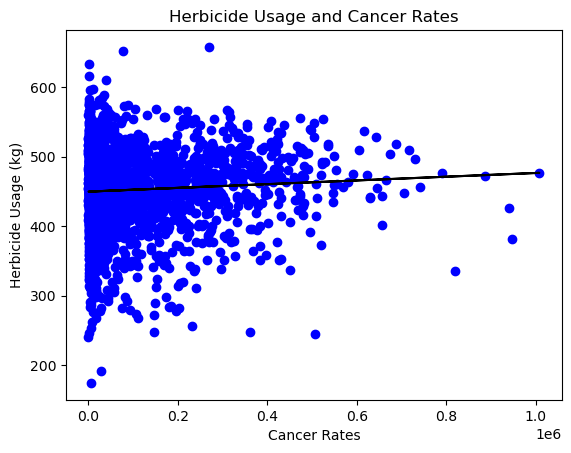

In [ ]:
#building a regression gui model for visual purposes
#referenced code/github in the read.me file
root=tk.Tk()
root.title("Regression_GUI")



#Setting Windows
canvas=tk.Canvas(root, width= 300, height=300)

canvas.pack()
label_1=tk.Label(root, text="Herbicide Usage and Cancer Incidence Rate",borderwidth=.01, font=("Arial Bold",20), justify='center')

canvas.create_window(200,40,window=label_1)

#using regression algorithm imported from sklearn
model=LinearRegression()
model.fit(X,y)

regression_model_mse=mean_squared_error(X,y)
print("MSE:", math.sqrt(regression_model_mse))
print("RSE: ", model.score(X,y))

#Setting labels for intercept and coefficient

coefficient=('Value of Co-efficient for the given sample is: ', model.coef_[0])
intercept=('Value of intercept for the given sample is :', model.intercept_[0])

label_intercept=tk.Label(root,text=intercept, justify='center')
label_intercept.configure(bg='beige')
canvas.create_window(260,220, window=label_intercept)
label_coefficient=tk.Label(root, text=coefficient, justify='center')

canvas.create_window(280,240,window=label_coefficient)

#label for input

label_2=tk.Label(root,text="Value for x", justify='center')

canvas.create_window(100,100,window=label_2)

entry_1=tk.Entry(root)
canvas.create_window(270,100,window=entry_1)

#function for accepting value from user and making predictionby the given data
def value():
    global New_X_Value
    New_X_Value=float(entry_1.get())
    
    #global New_Y_Value
    #New_Y_Value=float(entry_2.get())
    
    global res
    res=np.array(New_X_Value).reshape(-1,1)
    
    predicition_result= ('Prediction_Of_Value_of_Y:', model.predict(res))
    label_Prediction=tk.Label(root, text=predicition_result,bg='yellow')
    canvas.create_window(260,280, window=label_Prediction)
    
button_prediction=tk.Button(root,text='Predicted Value',command=value,borderwidth=.01,bg='yellow')
button_prediction.configure(bg='beige')

canvas.create_window(270,150,window=button_prediction)
    
#Plotting Graph on GUI

figure3 = plt.Figure(figsize=(20,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(data['Herbicide Sum'].astype(float),data['Cancer Incidence Rate Per 100k'].astype(float), color = 'blue')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend() 
ax3.set_xlabel('Cancer Incidence Rate')
ax3.set_title('Herbicide Usage and Cancer Incidence Rate')





plt.scatter(X,y,color="blue")
plt.plot(X,model.predict(X),color="black")
plt.title("Herbicide Usage and Cancer Rates")
plt.ylabel("Herbicide Usage (kg)")
plt.xlabel("Cancer Rates")
plt.show()


root.mainloop()